In [1]:
import numpy as np
import matplotlib.pyplot as plt

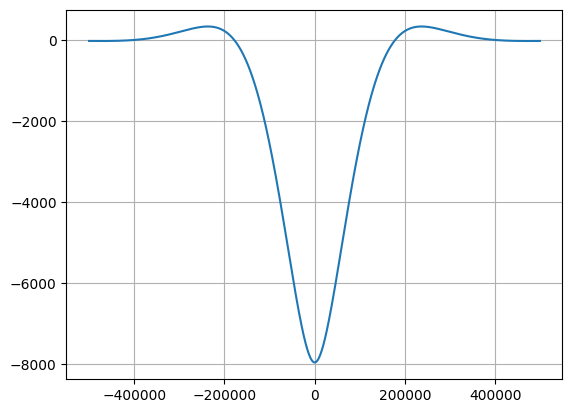

In [3]:
x = np.arange(-500e3, 500.0e3,1000)

Te = 20e3 # Espessura elástica efetiva

h = 4e3 # height
width = 100e3
rhoc = 2700.0 # Densidade da crosta

E = 1.0e11 # Módulo de Young [Pa]
v = 0.25 # Coeficiente de Poisson
g = 9.8 # Aceleração da gravidade [m/s²]


V0 = -h*width*g*rhoc

rhom =  3300 # Densidade do manto
rhor = 2400.0 # Densidade do sedimento

D = E*Te**3/(12*(1-v**2))

alpha = np.power(4*D/((rhom-rhor)*g), 0.25)

w0 = V0*alpha**3/(8*D)

xa = np.abs(x)

w = w0*np.exp(-xa/alpha)*(np.cos(xa/alpha)+np.sin(xa/alpha))

plt.plot(x, w)
plt.grid()